# **Time Series Prediction Project: Forecasting USA Energy Consumption**
By Haris Yafie

ID Dicoding: harisyafie

Email: yafie345@gmail.com

# Library

Import necessary library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.dates as mdates

# Data Wrangling
Before we go into modelling, we need to clean and preprocess our dataset.

## Data Collection
Download dataset of hourly energy consumption in US. The dataset collected from [Kaggle](https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption),I choose PJMW_hourly dataset. I uploaded the dataset to my personal Google Drive for easier access

In [ ]:
!gdown 1eYBrkPiNEBb7lPYP4YN04-6LHPMCLslA

Downloading...
From: https://drive.google.com/uc?id=1eYBrkPiNEBb7lPYP4YN04-6LHPMCLslA
To: /content/PJMW_hourly.csv
100% 3.87M/3.87M [00:00<00:00, 72.4MB/s]


## Read Dataset
Read the data with pandas read_csv

In [ ]:
df = pd.read_csv('/content/PJMW_hourly.csv')

In [ ]:
df

,Datetime,PJMW_MW
0,2002-12-31 01:00:00,5077.0
1,2002-12-31 02:00:00,4939.0
2,2002-12-31 03:00:00,4885.0
3,2002-12-31 04:00:00,4857.0
4,2002-12-31 05:00:00,4930.0
...,...,...
143201,2018-01-01 20:00:00,8401.0
143202,2018-01-01 21:00:00,8373.0
143203,2018-01-01 22:00:00,8238.0
143204,2018-01-01 23:00:00,7958.0


To gain basic information about the dataset

In [ ]:
# Basic information about the dataset
print("Basic Information about the Dataset:")
print(df.info())

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143206 entries, 0 to 143205
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  143206 non-null  object 
 1   PJMW_MW   143206 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB
None


## Change the 'Datetime' column into datetime format

In [ ]:
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
df.head()

,Datetime,PJMW_MW
0,2002-12-31 01:00:00,5077.0
1,2002-12-31 02:00:00,4939.0
2,2002-12-31 03:00:00,4885.0
3,2002-12-31 04:00:00,4857.0
4,2002-12-31 05:00:00,4930.0


In [ ]:
df['Year'] = df['Datetime'].dt.year

Count the data points in every year, we can see that the year 2002 and 2018 doesn't have complete data point in a year.

In [ ]:
df['Year'].value_counts()

2016    8784
2004    8782
2008    8782
2012    8782
2017    8760
2014    8760
2015    8760
2005    8758
2006    8758
2007    8758
2009    8758
2003    8758
2011    8758
2013    8758
2010    8757
2002    6597
2018    5136
Name: Year, dtype: int64

## Filter By Year
We are going to filter the dataset by years from 2013 and 2018 only.

In [ ]:
filtered_df = df[(df['Year'] >= 2013) & (df['Year'] <= 2018)]
filtered_df = filtered_df.sort_values(by='Datetime')

In [ ]:
filtered_df

,Datetime,PJMW_MW,Year
85490,2013-01-01 00:00:00,5512.0,2013
102983,2013-01-01 01:00:00,5311.0,2013
102984,2013-01-01 02:00:00,5161.0,2013
102985,2013-01-01 03:00:00,5057.0,2013
102986,2013-01-01 04:00:00,4989.0,2013
...,...,...,...
138090,2018-08-02 20:00:00,6545.0,2018
138091,2018-08-02 21:00:00,6496.0,2018
138092,2018-08-02 22:00:00,6325.0,2018
138093,2018-08-02 23:00:00,5892.0,2018


## Check Null Values
There is no null values in our dataset which is good

In [ ]:
filtered_df.isna().sum()

Datetime    0
PJMW_MW     0
Year        0
dtype: int64

## Check Duplicated Values
We also found that there is no duplicated values.

In [ ]:
filtered_df.duplicated().sum()

0

# Exploratory Data Analysis
To gain information about the dataset, we are going to explore the dataset with statistics and visualization.

## Statistics Descriptive
First, we are checking the statistics of the dataset. We are only checking by yearly. We use mean, standard deviation, count, minimum, quartile, and maximum values in this statistics descriptive

In [ ]:
filtered_df.groupby(filtered_df['Datetime'].dt.year)['PJMW_MW'].describe()

,count,mean,std,min,25%,50%,75%,max
Datetime,,,,,,,,
2013,8758.0,5556.783626,950.712525,3197.0,4858.00,5527.0,6248.00,8677.0
2014,8760.0,5656.334132,1045.337633,3357.0,4900.00,5529.0,6367.25,9349.0
2015,8760.0,5620.985616,1090.762125,3526.0,4809.00,5452.0,6328.25,9594.0
2016,8784.0,5577.929531,1039.058698,3420.0,4829.00,5393.0,6274.25,8755.0
2017,8760.0,5500.184361,935.480394,3475.0,4831.00,5392.0,6092.00,8503.0
2018,5136.0,5848.157516,1016.090591,3687.0,5151.75,5757.0,6484.25,9342.0


## Time Series Plot
Next, we are going to make time series plot to see the values during interval time we set below from hourly, daily, monthly, and all data points.

### Combined Time Series Plot
This time series plot contain all the years from 2013 to 2018 and the data points show in hourly format.

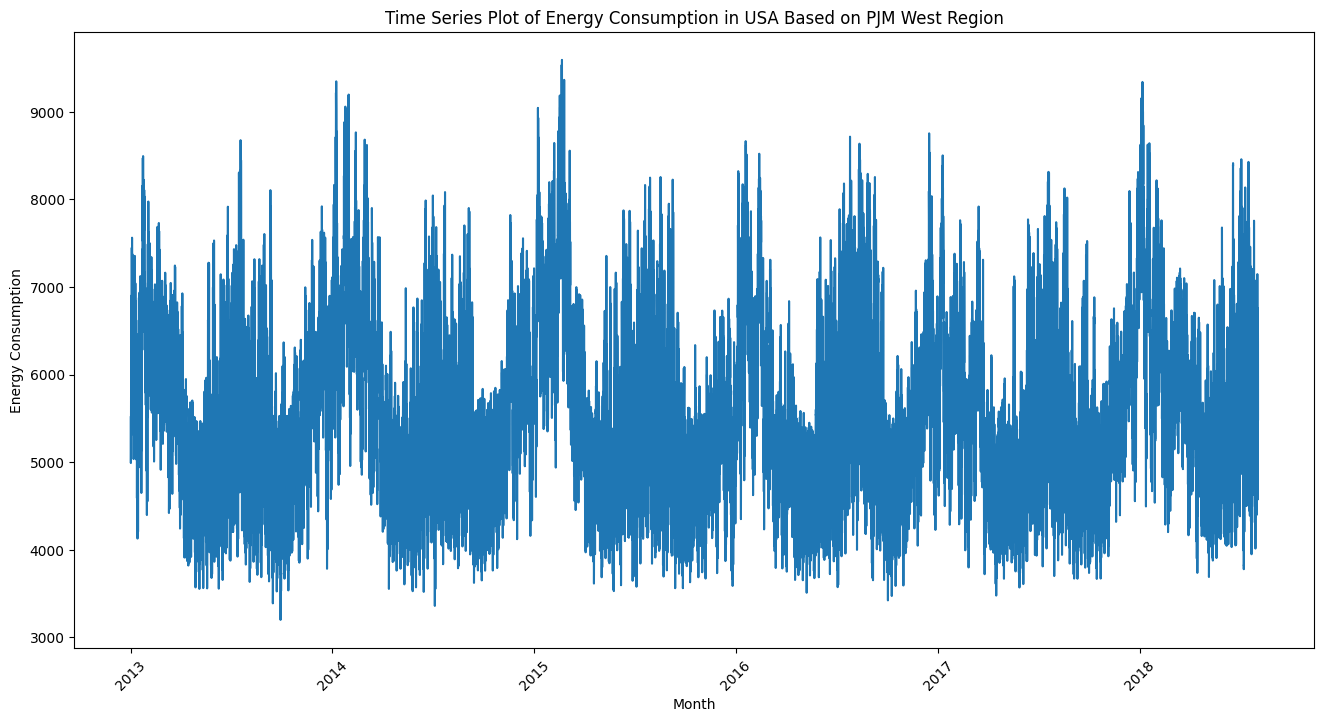

In [ ]:
fig, ax= plt.subplots(figsize=(16,8))

sns.lineplot(
        x= filtered_df['Datetime'], y= filtered_df['PJMW_MW']
    )
ax.set_title('Time Series Plot of Energy Consumption in USA Based on PJM West Region', loc="center")
ax.set_xlabel('Month')
ax.set_ylabel('Energy Consumption')
ax.tick_params(axis='y')
ax.tick_params(axis='x', rotation=45)

plt.show()

### Monthly Time Series Plot
This time series plot shows monthly energy consumption in PJM West Region US from 2013 to 2018



Create monthly dataframe for plotting

In [ ]:
monthly_plot = filtered_df.resample('M', on='Datetime').sum()
monthly_plot['Year'] = monthly_plot.index.year
monthly_plot

,PJMW_MW,Year
Datetime,,
2013-01-31,4628074.0,2013
2013-02-28,4275816.0,2013
2013-03-31,4371069.0,2013
2013-04-30,3560344.0,2013
2013-05-31,3700349.0,2013
...,...,...
2018-04-30,3802520.0,2018
2018-05-31,3927294.0,2018
2018-06-30,4002715.0,2018


Divide the monthly dataframe one by one into monthly per year from 2013 to 2018

In [ ]:
years = [2013, 2014, 2015, 2016, 2017, 2018]

for year in years:
    variable_name = f"monthly_plot_{year}"
    globals()[variable_name] = monthly_plot[(monthly_plot['Year'] == year)]
    globals()[variable_name]['Date'] = globals()[variable_name].index.strftime('%Y-%m')

<ipython-input-17-7decd545d6a8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[variable_name]['Date'] = globals()[variable_name].index.strftime('%Y-%m')
<ipython-input-17-7decd545d6a8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[variable_name]['Date'] = globals()[variable_name].index.strftime('%Y-%m')
<ipython-input-17-7decd545d6a8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
monthly_plot_2013

,PJMW_MW,Year,Date
Datetime,,,
2013-01-31,4628074.0,2013,2013-01
2013-02-28,4275816.0,2013,2013-02
2013-03-31,4371069.0,2013,2013-03
2013-04-30,3560344.0,2013,2013-04
2013-05-31,3700349.0,2013,2013-05
2013-06-30,3863045.0,2013,2013-06
2013-07-31,4333649.0,2013,2013-07
2013-08-31,4052174.0,2013,2013-08
2013-09-30,3604833.0,2013,2013-09


In [ ]:
monthly_plot_2014

,PJMW_MW,Year,Date
Datetime,,,
2014-01-31,5215339.0,2014,2014-01
2014-02-28,4446508.0,2014,2014-02
2014-03-31,4518866.0,2014,2014-03
2014-04-30,3583849.0,2014,2014-04
2014-05-31,3644588.0,2014,2014-05
2014-06-30,3959259.0,2014,2014-06
2014-07-31,4151977.0,2014,2014-07
2014-08-31,4078754.0,2014,2014-08
2014-09-30,3728785.0,2014,2014-09


In [ ]:
monthly_plot_2015

,PJMW_MW,Year,Date
Datetime,,,
2015-01-31,5042606.0,2015,2015-01
2015-02-28,4884805.0,2015,2015-02
2015-03-31,4470973.0,2015,2015-03
2015-04-30,3567920.0,2015,2015-04
2015-05-31,3833117.0,2015,2015-05
2015-06-30,3964464.0,2015,2015-06
2015-07-31,4301440.0,2015,2015-07
2015-08-31,4153807.0,2015,2015-08
2015-09-30,3807720.0,2015,2015-09


In [ ]:
monthly_plot_2016

,PJMW_MW,Year,Date
Datetime,,,
2016-01-31,4842304.0,2016,2016-01
2016-02-29,4333490.0,2016,2016-02
2016-03-31,3852288.0,2016,2016-03
2016-04-30,3554983.0,2016,2016-04
2016-05-31,3613988.0,2016,2016-05
2016-06-30,3932122.0,2016,2016-06
2016-07-31,4434446.0,2016,2016-07
2016-08-31,4654274.0,2016,2016-08
2016-09-30,3903418.0,2016,2016-09


In [ ]:
monthly_plot_2017

,PJMW_MW,Year,Date
Datetime,,,
2017-01-31,4535246.0,2017,2017-01
2017-02-28,3825382.0,2017,2017-02
2017-03-31,4220627.0,2017,2017-03
2017-04-30,3460163.0,2017,2017-04
2017-05-31,3646754.0,2017,2017-05
2017-06-30,3943915.0,2017,2017-06
2017-07-31,4347167.0,2017,2017-07
2017-08-31,4173146.0,2017,2017-08
2017-09-30,3680571.0,2017,2017-09


In [ ]:
monthly_plot_2018

,PJMW_MW,Year,Date
Datetime,,,
2018-01-31,5111213.0,2018,2018-01
2018-02-28,4018298.0,2018,2018-02
2018-03-31,4438080.0,2018,2018-03
2018-04-30,3802520.0,2018,2018-04
2018-05-31,3927294.0,2018,2018-05
2018-06-30,4002715.0,2018,2018-06
2018-07-31,4448174.0,2018,2018-07
2018-08-31,287843.0,2018,2018-08


#### Plot the monthly time series plot

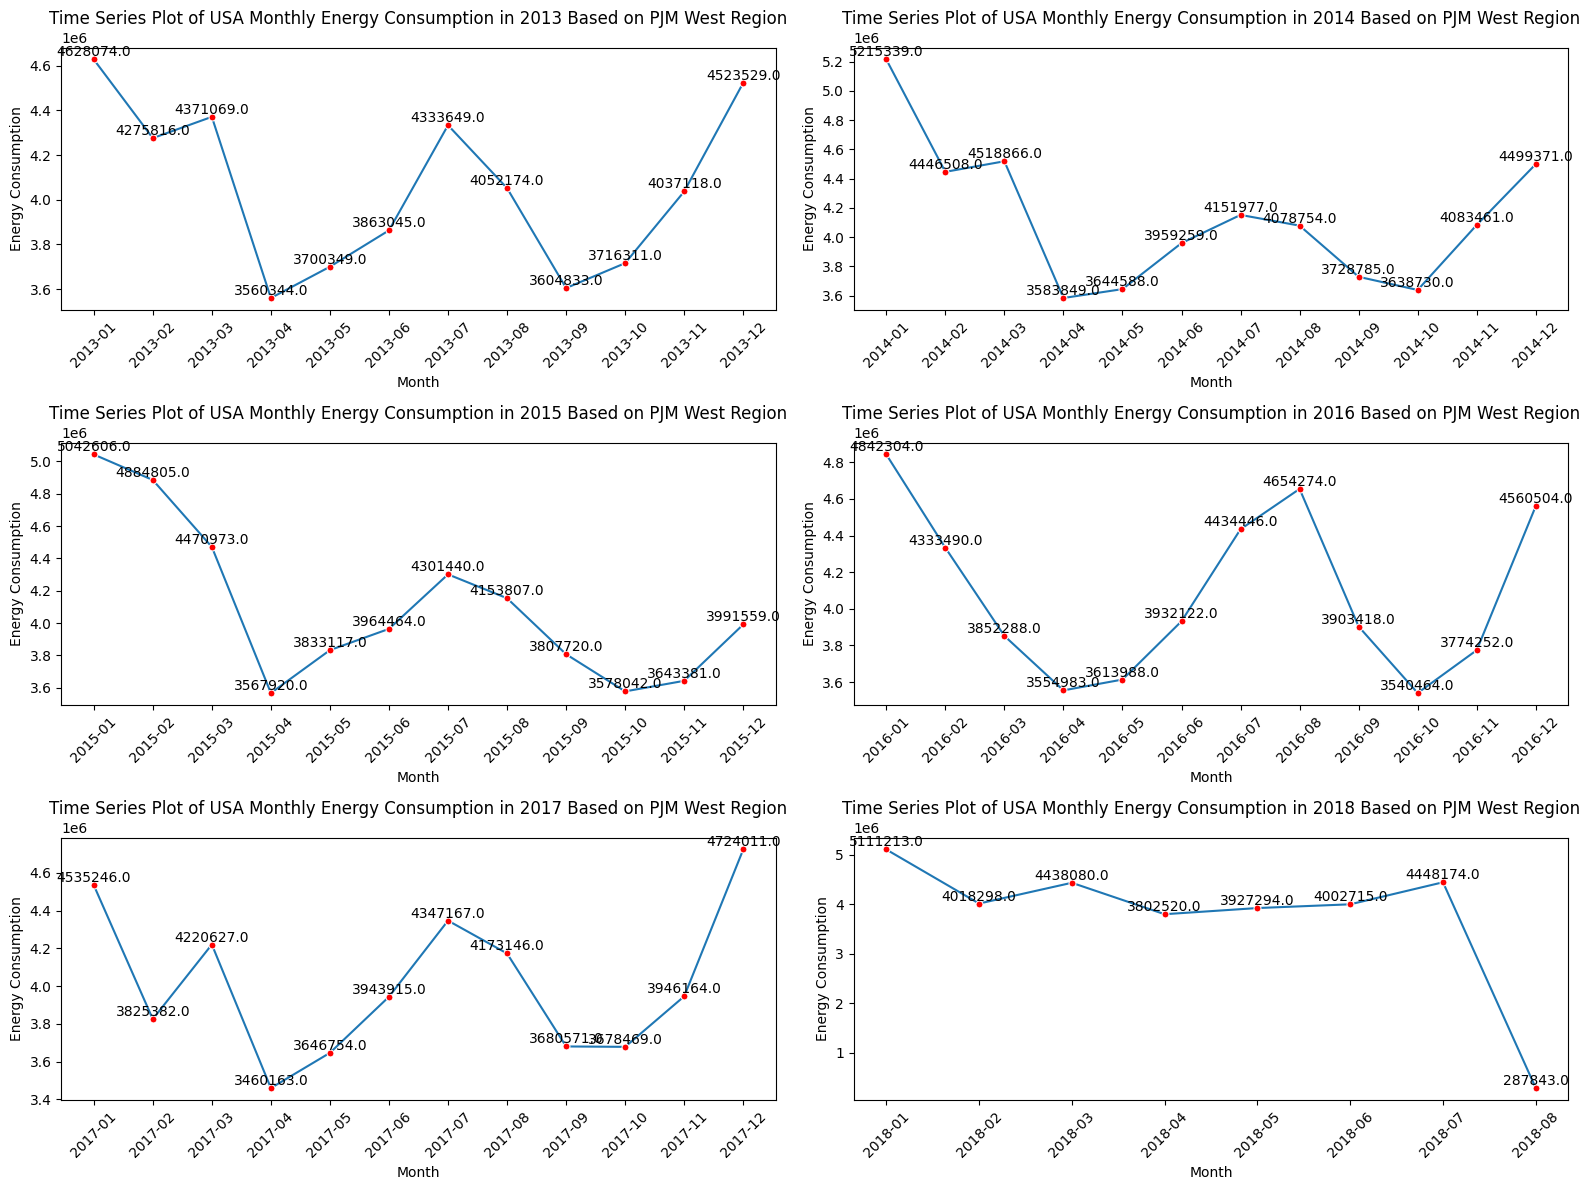

In [ ]:
fig, ax = plt.subplots(figsize=(16, 12), nrows=3, ncols=2)

for i, year in enumerate(years):
    row_index = i // 2  # Integer division to determine the row index
    col_index = i % 2   # Modulo operation to determine the column index

    monthly_plot_year = globals()[f"monthly_plot_{year}"]

    sns.lineplot(
        x=monthly_plot_year['Date'], y=monthly_plot_year['PJMW_MW'],
        marker='.',
        markersize=10,
        markerfacecolor='red',
        ax=ax[row_index, col_index]
    )

    ax[row_index, col_index].set_title(f'Time Series Plot of USA Monthly Energy Consumption in {year} Based on PJM West Region', loc="center")
    ax[row_index, col_index].set_xlabel('Month')
    ax[row_index, col_index].set_ylabel('Energy Consumption')
    ax[row_index, col_index].tick_params(axis='y')
    ax[row_index, col_index].tick_params(axis='x', rotation=45)

    # Annotate y-values on the markers
    for index, value in monthly_plot_year['PJMW_MW'].items():
        ax[row_index, col_index].text(monthly_plot_year['Date'][index], value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Daily Time Series Plot
This time series plot shows daily energy consumption in PJM West Region US from 2013 to 2018

Create daily dataframe for time series plotting

In [ ]:
daily_plot = filtered_df.resample('D', on='Datetime').sum()
daily_plot['Year'] = daily_plot.index.year
daily_plot

,PJMW_MW,Year
Datetime,,
2013-01-01,136822.0,2013
2013-01-02,154843.0,2013
2013-01-03,162467.0,2013
2013-01-04,157859.0,2013
2013-01-05,145084.0,2013
...,...,...
2018-07-30,131825.0,2018
2018-07-31,135858.0,2018
2018-08-01,143033.0,2018


Divide the daily dataframe into a data frame for each year from 2013 to 2018

In [ ]:
years = [2013, 2014, 2015, 2016, 2017, 2018]

for year in years:
    variable_name = f"daily_plot_{year}"
    globals()[variable_name] = daily_plot[(daily_plot['Year'] == year)]
    globals()[variable_name]['Date'] = globals()[variable_name].index.strftime('%Y-%m')

<ipython-input-26-8278345059cb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[variable_name]['Date'] = globals()[variable_name].index.strftime('%Y-%m')
<ipython-input-26-8278345059cb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[variable_name]['Date'] = globals()[variable_name].index.strftime('%Y-%m')
<ipython-input-26-8278345059cb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
daily_plot_2013

,PJMW_MW,Year,Date
Datetime,,,
2013-01-01,136822.0,2013,2013-01
2013-01-02,154843.0,2013,2013-01
2013-01-03,162467.0,2013,2013-01
2013-01-04,157859.0,2013,2013-01
2013-01-05,145084.0,2013,2013-01
...,...,...,...
2013-12-27,148021.0,2013,2013-12
2013-12-28,134130.0,2013,2013-12
2013-12-29,129078.0,2013,2013-12


In [ ]:
daily_plot_2014

,PJMW_MW,Year,Date
Datetime,,,
2014-01-01,142860.0,2014,2014-01
2014-01-02,159127.0,2014,2014-01
2014-01-03,178884.0,2014,2014-01
2014-01-04,169990.0,2014,2014-01
2014-01-05,154538.0,2014,2014-01
...,...,...,...
2014-12-27,125496.0,2014,2014-12
2014-12-28,122385.0,2014,2014-12
2014-12-29,139654.0,2014,2014-12


In [ ]:
daily_plot_2015

,PJMW_MW,Year,Date
Datetime,,,
2015-01-01,147890.0,2015,2015-01
2015-01-02,147005.0,2015,2015-01
2015-01-03,144907.0,2015,2015-01
2015-01-04,125711.0,2015,2015-01
2015-01-05,157869.0,2015,2015-01
...,...,...,...
2015-12-27,107337.0,2015,2015-12
2015-12-28,129066.0,2015,2015-12
2015-12-29,128816.0,2015,2015-12


In [ ]:
daily_plot_2016

,PJMW_MW,Year,Date
Datetime,,,
2016-01-01,130361.0,2016,2016-01
2016-01-02,133774.0,2016,2016-01
2016-01-03,134286.0,2016,2016-01
2016-01-04,157645.0,2016,2016-01
2016-01-05,176312.0,2016,2016-01
...,...,...,...
2016-12-27,121502.0,2016,2016-12
2016-12-28,136320.0,2016,2016-12
2016-12-29,142332.0,2016,2016-12


In [ ]:
daily_plot_2017

,PJMW_MW,Year,Date
Datetime,,,
2017-01-01,123072.0,2017,2017-01
2017-01-02,130028.0,2017,2017-01
2017-01-03,139860.0,2017,2017-01
2017-01-04,143084.0,2017,2017-01
2017-01-05,166550.0,2017,2017-01
...,...,...,...
2017-12-27,171125.0,2017,2017-12
2017-12-28,186595.0,2017,2017-12
2017-12-29,179888.0,2017,2017-12


In [ ]:
daily_plot_2018

,PJMW_MW,Year,Date
Datetime,,,
2018-01-01,185644.0,2018,2018-01
2018-01-02,193076.0,2018,2018-01
2018-01-03,193848.0,2018,2018-01
2018-01-04,193836.0,2018,2018-01
2018-01-05,211070.0,2018,2018-01
...,...,...,...
2018-07-30,131825.0,2018,2018-07
2018-07-31,135858.0,2018,2018-07
2018-08-01,143033.0,2018,2018-08


#### Plot the daily time series plot from 2013 to 2018

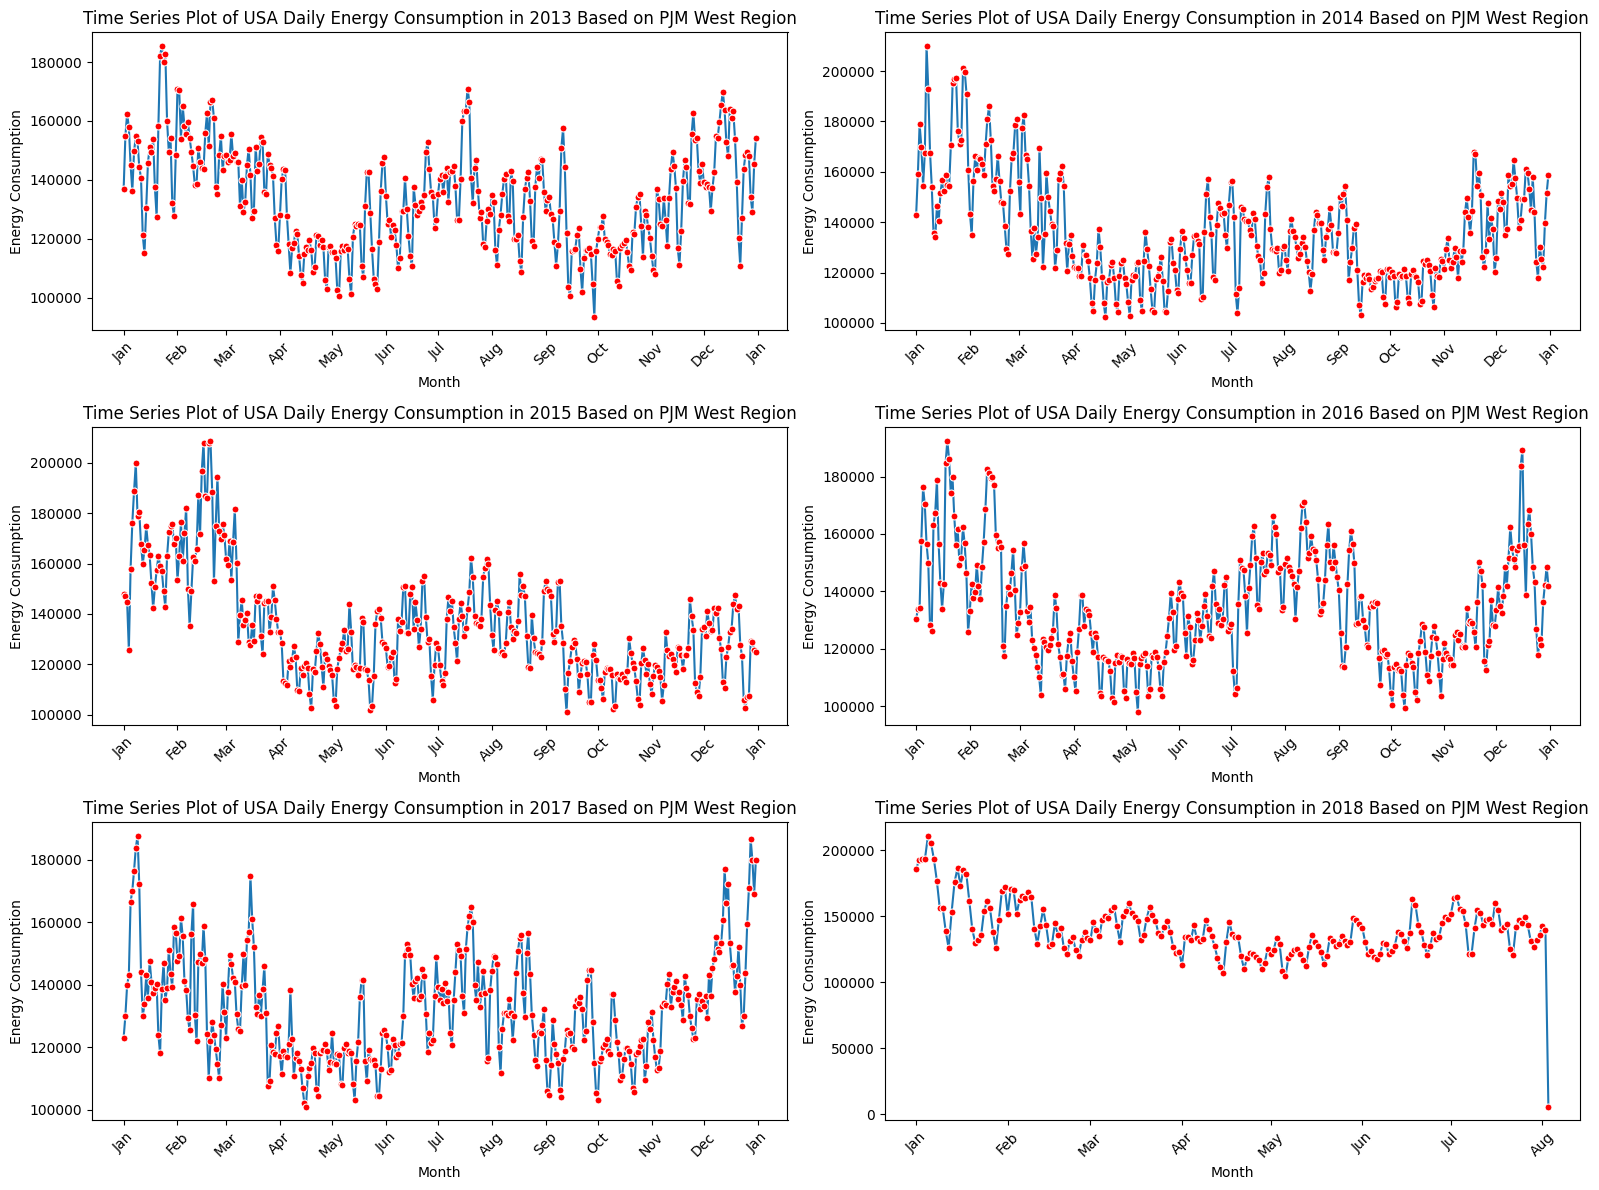

In [ ]:
fig, ax = plt.subplots(figsize=(16, 12), nrows=3, ncols=2)

for i, year in enumerate(years):
    row_index = i // 2  # Integer division to determine the row index
    col_index = i % 2   # Modulo operation to determine the column index

    daily_plot_year = globals()[f"daily_plot_{year}"]

    sns.lineplot(
        x=daily_plot_year.index, y=daily_plot_year['PJMW_MW'],
        marker='.',
        markersize=10,
        markerfacecolor='red',
        ax=ax[row_index, col_index]
    )

    ax[row_index, col_index].set_title(f'Time Series Plot of USA Daily Energy Consumption in {year} Based on PJM West Region', loc="center")
    ax[row_index, col_index].set_xlabel('Month')
    ax[row_index, col_index].set_ylabel('Energy Consumption')
    ax[row_index, col_index].tick_params(axis='y')
    ax[row_index, col_index].tick_params(axis='x', rotation=45)

    # Set x-axis ticks to show every month
    ax[row_index, col_index].xaxis.set_major_locator(mdates.MonthLocator())
    ax[row_index, col_index].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()
plt.show()

### Hourly by Year Time Series Plot
This time series plot shows hourly energy consumption in PJM West Region US from 2013 to 2018

Because the dataset is already in hourly format, so we only going to divide the dataframe into a dataframe for each year from 2013 to 2018

In [ ]:
years = [2013, 2014, 2015, 2016, 2017, 2018]

for year in years:
    variable_name = f"hourly_plot_{year}"
    globals()[variable_name] = filtered_df[(filtered_df['Year'] == year)]

In [ ]:
hourly_plot_2013

,Datetime,PJMW_MW,Year
85490,2013-01-01 00:00:00,5512.0,2013
102983,2013-01-01 01:00:00,5311.0,2013
102984,2013-01-01 02:00:00,5161.0,2013
102985,2013-01-01 03:00:00,5057.0,2013
102986,2013-01-01 04:00:00,4989.0,2013
...,...,...,...
94267,2013-12-31 19:00:00,7062.0,2013
94268,2013-12-31 20:00:00,6878.0,2013
94269,2013-12-31 21:00:00,6676.0,2013
94270,2013-12-31 22:00:00,6475.0,2013


In [ ]:
hourly_plot_2014

,Datetime,PJMW_MW,Year
94272,2014-01-01 00:00:00,6085.0,2014
111743,2014-01-01 01:00:00,5896.0,2014
111744,2014-01-01 02:00:00,5779.0,2014
111745,2014-01-01 03:00:00,5664.0,2014
111746,2014-01-01 04:00:00,5631.0,2014
...,...,...,...
103025,2014-12-31 19:00:00,7213.0,2014
103026,2014-12-31 20:00:00,7103.0,2014
103027,2014-12-31 21:00:00,6965.0,2014
103028,2014-12-31 22:00:00,6787.0,2014


In [ ]:
hourly_plot_2015

,Datetime,PJMW_MW,Year
103030,2015-01-01 00:00:00,6365.0,2015
120503,2015-01-01 01:00:00,6184.0,2015
120504,2015-01-01 02:00:00,6035.0,2015
120505,2015-01-01 03:00:00,6049.0,2015
120506,2015-01-01 04:00:00,5972.0,2015
...,...,...,...
111785,2015-12-31 19:00:00,5984.0,2015
111786,2015-12-31 20:00:00,5873.0,2015
111787,2015-12-31 21:00:00,5670.0,2015
111788,2015-12-31 22:00:00,5466.0,2015


In [ ]:
hourly_plot_2016

,Datetime,PJMW_MW,Year
111790,2016-01-01 00:00:00,5125.0,2016
129287,2016-01-01 01:00:00,4965.0,2016
129288,2016-01-01 02:00:00,4891.0,2016
129289,2016-01-01 03:00:00,4831.0,2016
129290,2016-01-01 04:00:00,4727.0,2016
...,...,...,...
120545,2016-12-31 19:00:00,6205.0,2016
120546,2016-12-31 20:00:00,6005.0,2016
120547,2016-12-31 21:00:00,5812.0,2016
120548,2016-12-31 22:00:00,5646.0,2016


In [ ]:
hourly_plot_2017

,Datetime,PJMW_MW,Year
120550,2017-01-01 00:00:00,5231.0,2017
138047,2017-01-01 01:00:00,5007.0,2017
138048,2017-01-01 02:00:00,4882.0,2017
138049,2017-01-01 03:00:00,4761.0,2017
138050,2017-01-01 04:00:00,4719.0,2017
...,...,...,...
129329,2017-12-31 19:00:00,8205.0,2017
129330,2017-12-31 20:00:00,8053.0,2017
129331,2017-12-31 21:00:00,8012.0,2017
129332,2017-12-31 22:00:00,7864.0,2017


In [ ]:
hourly_plot_2018

,Datetime,PJMW_MW,Year
129334,2018-01-01 00:00:00,7612.0,2018
143182,2018-01-01 01:00:00,7469.0,2018
143183,2018-01-01 02:00:00,7423.0,2018
143184,2018-01-01 03:00:00,7380.0,2018
143185,2018-01-01 04:00:00,7366.0,2018
...,...,...,...
138090,2018-08-02 20:00:00,6545.0,2018
138091,2018-08-02 21:00:00,6496.0,2018
138092,2018-08-02 22:00:00,6325.0,2018
138093,2018-08-02 23:00:00,5892.0,2018


#### Plot the hourly time series plot from 2013 to 2018

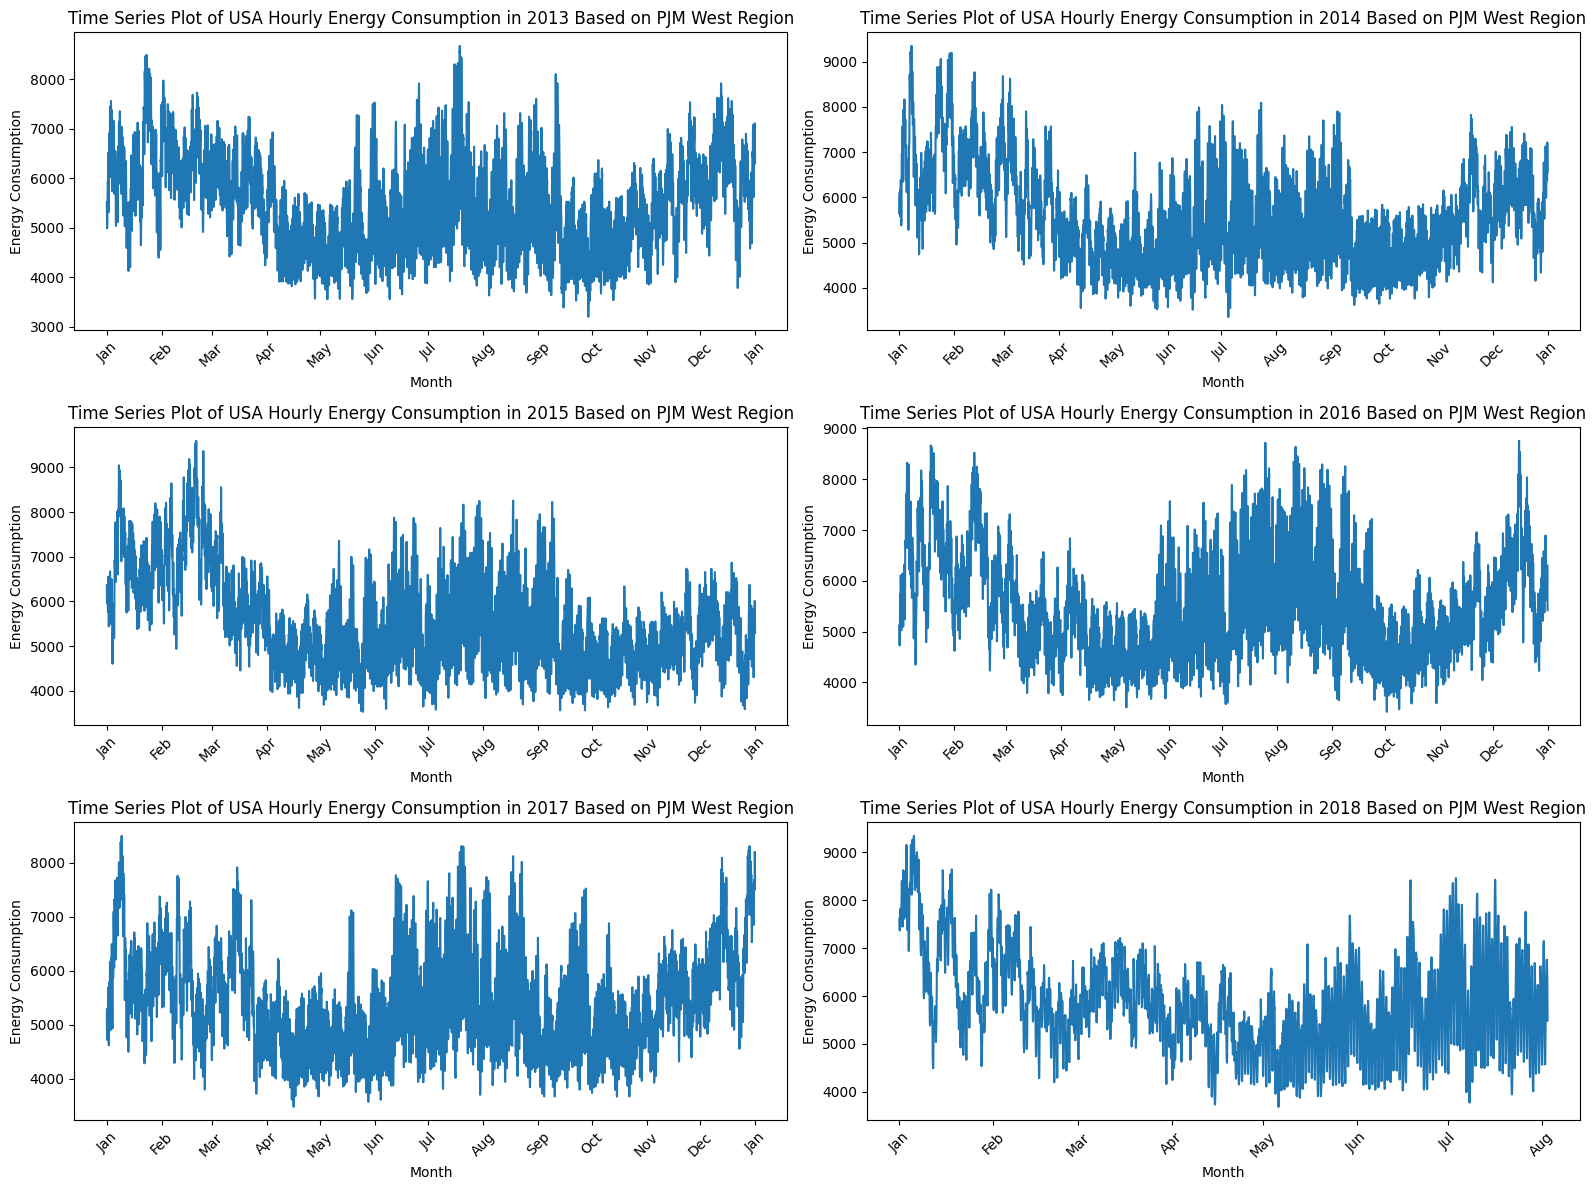

In [ ]:
fig, ax = plt.subplots(figsize=(16, 12), nrows=3, ncols=2)

for i, year in enumerate(years):
    row_index = i // 2  # Integer division to determine the row index
    col_index = i % 2   # Modulo operation to determine the column index

    hourly_plot_year = globals()[f"hourly_plot_{year}"]

    sns.lineplot(
        x=hourly_plot_year['Datetime'], y=hourly_plot_year['PJMW_MW'],
        # marker='.',
        # markersize=10,
        # markerfacecolor='red',
        ax=ax[row_index, col_index]
    )

    ax[row_index, col_index].set_title(f'Time Series Plot of USA Hourly Energy Consumption in {year} Based on PJM West Region', loc="center")
    ax[row_index, col_index].set_xlabel('Month')
    ax[row_index, col_index].set_ylabel('Energy Consumption')
    ax[row_index, col_index].tick_params(axis='y')
    ax[row_index, col_index].tick_params(axis='x', rotation=45)

    # Set x-axis ticks to show every month
    ax[row_index, col_index].xaxis.set_major_locator(mdates.MonthLocator())
    ax[row_index, col_index].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.tight_layout()
plt.show()

### Conclusion of time series plot
It can be seen from the hourly, daily, monthly, and combined time series plots that they have a seasonal pattern where January-March, June-August, November-December have the highest energy consumption and have the same pattern every year, except for 2018 where the dataset in this year is not yet complete.

## Total Energy Consumption by Year
Beside time series plot, we also can use bar plot to see the total energy consumption each year.

Create a yearly total energy consumption

In [ ]:
yearly_energy_consumption = filtered_df['PJMW_MW'].groupby(filtered_df['Year']).sum()
yearly_energy_consumption.sort_values(ascending=False)

Year
2014    49549487.0
2015    49239834.0
2016    48996533.0
2013    48666311.0
2017    48181615.0
2018    30036137.0
Name: PJMW_MW, dtype: float64

Plot a bar plot to see total energy consumption from 2013 to 2018

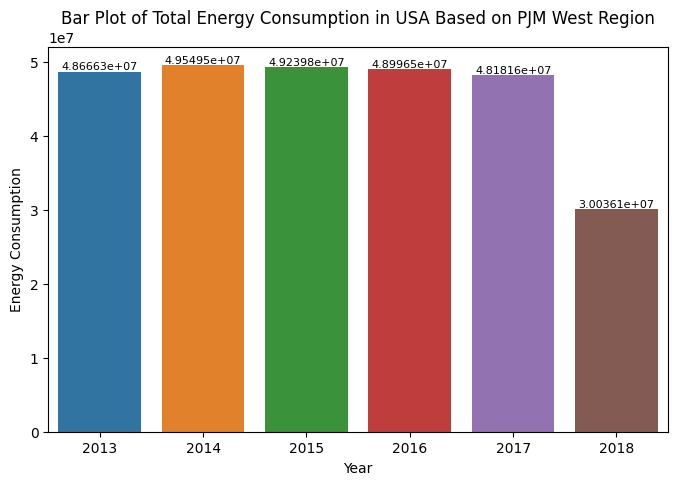

In [ ]:
fig, ax= plt.subplots(figsize=(8,5))

sns.barplot(
       x= yearly_energy_consumption.index, y= yearly_energy_consumption
    )
ax.set_title('Bar Plot of Total Energy Consumption in USA Based on PJM West Region', loc="center")
ax.set_xlabel('Year')
ax.set_ylabel('Energy Consumption')
ax.tick_params(axis='y')
ax.tick_params(axis='x')
ax.bar_label(ax.containers[0], rotation=0, fontsize=8)

plt.show()

# Modelling
After data cleaning and data exploration, next up modelling our machine learning model. But first we need to prepare the dataset that will be normalized and split the dataset

Select necessary columns and named our dataframe into 'pred_df'

In [ ]:
selected_columns = ['Datetime', 'PJMW_MW']

pred_df = filtered_df[selected_columns]
pred_df

,Datetime,PJMW_MW
85490,2013-01-01 00:00:00,5512.0
102983,2013-01-01 01:00:00,5311.0
102984,2013-01-01 02:00:00,5161.0
102985,2013-01-01 03:00:00,5057.0
102986,2013-01-01 04:00:00,4989.0
...,...,...
138090,2018-08-02 20:00:00,6545.0
138091,2018-08-02 21:00:00,6496.0
138092,2018-08-02 22:00:00,6325.0
138093,2018-08-02 23:00:00,5892.0


## Data Normalization
Before proceeding with further modelling we must ensure that the data is normalized. Normalization can help the optimization algorithm converge faster during training, avoid numerical instabilities, ensures that all features contribute equally to the learning process, and easier to interpret the importance of features in a model.

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
pred_df['PJMW_MW'] = standard_scaler.fit_transform(pred_df['PJMW_MW'].values.reshape(-1,1))
pred_df

<ipython-input-45-9bb150745747>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df['PJMW_MW'] = standard_scaler.fit_transform(pred_df['PJMW_MW'].values.reshape(-1,1))


,Datetime,PJMW_MW
85490,2013-01-01 00:00:00,-0.096511
102983,2013-01-01 01:00:00,-0.293819
102984,2013-01-01 02:00:00,-0.441064
102985,2013-01-01 03:00:00,-0.543154
102986,2013-01-01 04:00:00,-0.609905
...,...,...
138090,2018-08-02 20:00:00,0.917514
138091,2018-08-02 21:00:00,0.869414
138092,2018-08-02 22:00:00,0.701555
138093,2018-08-02 23:00:00,0.276509


## Data Splitting
Split the dataset into train dataset, validation dataset, and testing dataset. Training and validation dataset will be used during model training while testing dataset will be used for prediction. The dataset is divided into 80:20 ratio where training is 80% of the dataset while validation/testing dataset is 20%. The difference between validation and testing dataset, that the testing dataset takes account with windows size while validation dataset not.

In [ ]:
from sklearn.model_selection import train_test_split

def split_time_series_data(data, test_ratio=0.2, window_size=int):
    """
    Split time series data into training and testing sets.

    Parameters:
    - data: pandas DataFrame with time series data
    - test_ratio: float, the ratio of the dataset to be used for testing (default is 0.2)

    Returns:
    - train_data: pandas DataFrame, training set
    - test_data: pandas DataFrame, testing set
    """

    # Sort the data by the time column (assuming the time column is named 'time')
    data = data.sort_values(by='Datetime')

    # Calculate the index to split the data
    split_index = int((1 - test_ratio) * len(data))

    # Split the data into training and testing sets
    train_data, validation_data, test_data = data.iloc[:split_index, :], data.iloc[split_index:, :], data.iloc[split_index-window_size:-1, :]

    return train_data, validation_data, test_data

In [ ]:
train_data, validation_data, test_data = split_time_series_data(pred_df, test_ratio=0.2, window_size=24)

In [ ]:
validation_data.shape

(9792, 2)

In [ ]:
test_data.shape

(9815, 2)

## Create Windowed Datased
For the dataset can be properly inputted to the model we need to create windowed dataset. Windowed dataset prepare the input-output pairs for training a machine learning model, especially for tasks like time series forecasting. A windowed dataset involves creating overlapping or non-overlapping "windows" or segments of the time series. Each window consists of a sequence of consecutive data points, and the goal is to use these windows to train a model to predict future values based on historical information.

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
energy_train = train_data['PJMW_MW'].values
energy_validation = validation_data['PJMW_MW'].values

In [ ]:
window_size = 24
batch_size = 32
shuffle_buffer = 1000

In [ ]:
train_set = windowed_dataset(energy_train, window_size, batch_size, shuffle_buffer)

In [ ]:
# Generate data windows from the validation set
val_set = windowed_dataset(energy_validation, window_size, batch_size, shuffle_buffer)

## Model Building
After preparing the dataset, then we are going to build the model. We are going to use Bidirectional LSTM and Dense layers.

### Build layers of model

In [ ]:
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Bidirectional(LSTM(64, activation='tanh', return_sequences=True, input_shape=[window_size, 1])),
  tf.keras.layers.Bidirectional(LSTM(64, activation='tanh', return_sequences=True)),
  tf.keras.layers.Bidirectional(LSTM(64, activation='tanh', return_sequences=True)),
  tf.keras.layers.Bidirectional(LSTM(64, activation='tanh')),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(48, activation="relu"),
  tf.keras.layers.Dense(1),
])

# Build the model
model.build(input_shape=(None, window_size, 1))

Summarize the model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 24, 128)           33792     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 24, 128)           98816     
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 24, 128)           98816     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 64)                8

### Model Compiling
We use SGD for the optimizers and Huber for loss function with Mean Absolute Error (MAE) as the metrics of model performance.

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

## Model Training
Let's start our training soldier!

In [ ]:
history = model.fit(train_set,
                    epochs=10,
                    validation_data=val_set
                    )

Epoch 1/10
1224/1224 [==============================] - 169s 122ms/step - loss: 0.0156 - mae: 0.1131 - val_loss: 0.0054 - val_mae: 0.0768
Epoch 2/10
1224/1224 [==============================] - 144s 117ms/step - loss: 0.0059 - mae: 0.0822 - val_loss: 0.0051 - val_mae: 0.0752
Epoch 3/10
1224/1224 [==============================] - 149s 121ms/step - loss: 0.0054 - mae: 0.0780 - val_loss: 0.0045 - val_mae: 0.0718
Epoch 4/10
1224/1224 [==============================] - 144s 118ms/step - loss: 0.0045 - mae: 0.0717 - val_loss: 0.0048 - val_mae: 0.0744
Epoch 5/10
1224/1224 [==============================] - 141s 115ms/step - loss: 0.0043 - mae: 0.0694 - val_loss: 0.0063 - val_mae: 0.0864
Epoch 6/10
1224/1224 [==============================] - 145s 118ms/step - loss: 0.0040 - mae: 0.0678 - val_loss: 0.0053 - val_mae: 0.0768
Epoch 7/10
1224/1224 [==============================] - 143s 117ms/step - loss: 0.0041 - mae: 0.0674 - val_loss: 0.0061 - val_mae: 0.0882
Epoch 8/10
1224/1224 [============

We have finished our training and we got validation MAE of 0.0565

## Model Evaluation
Model evaluation from the results of the training process is shown by creating MAE plots and loss plots for training and validation.

Function to create model evaluation plot

In [ ]:
def plot_series(x, y, format="-", start=0, end=None,
                title=None, xlabel=None, ylabel=None, legend=None ):
    """
    Visualizes time series data

    Args:
      x (array of int) - contains values for the x-axis
      y (array of int or tuple of arrays) - contains the values for the y-axis
      format (string) - line style when plotting the graph
      start (int) - first time step to plot
      end (int) - last time step to plot
      title (string) - title of the plot
      xlabel (string) - label for the x-axis
      ylabel (string) - label for the y-axis
      legend (list of strings) - legend for the plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    # Check if there are more than two series to plot
    if type(y) is tuple:

      # Loop over the y elements
      for y_curr in y:

        # Plot the x and current y values
        plt.plot(x[start:end], y_curr[start:end], format)

    else:
      # Plot the x and y values
      plt.plot(x[start:end], y[start:end], format)

    # Label the x-axis
    plt.xlabel(xlabel)

    # Label the y-axis
    plt.ylabel(ylabel)

    # Set the legend
    if legend:
      plt.legend(legend)

    # Set the title
    plt.title(title)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

### Create the model evaluation plot

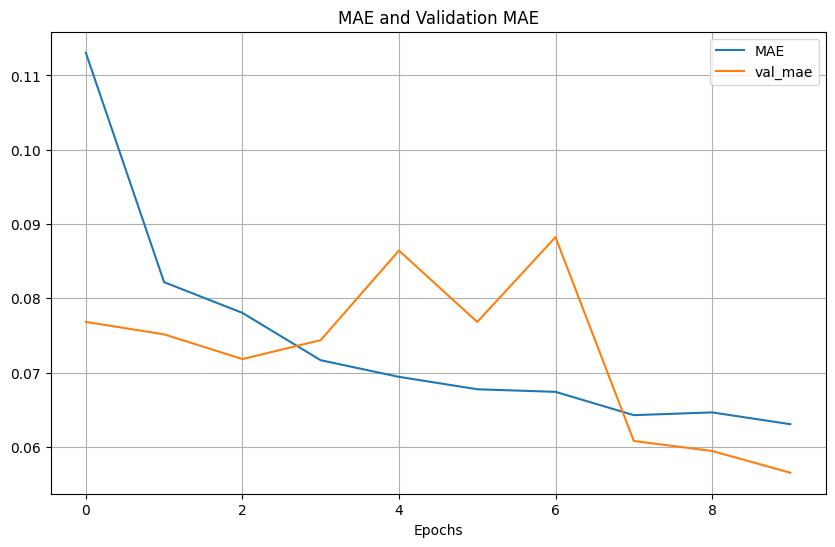

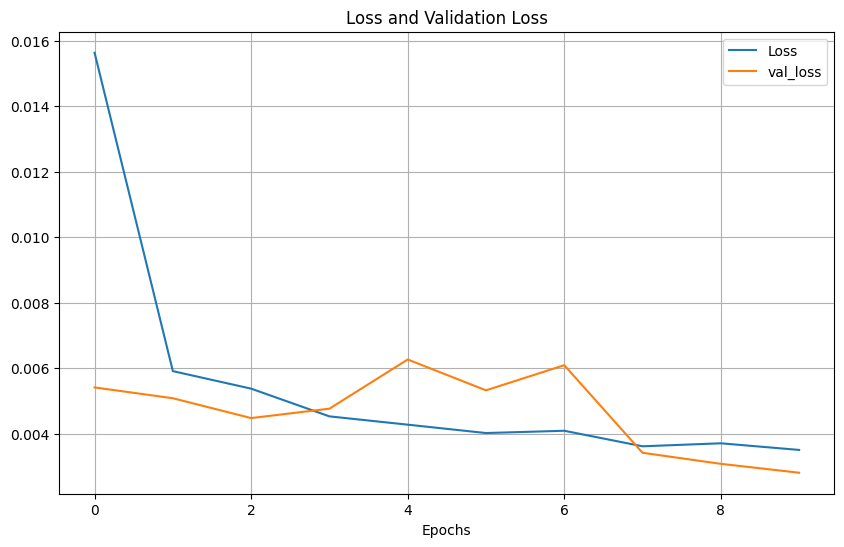

In [ ]:
# Get mae and loss from history log
mae=history.history['mae']
loss=history.history['loss']
vali_mae = history.history['val_mae']
vali_loss = history.history['val_loss']

# Get number of epochs
epochs=range(len(loss))

plot_series(
    x=epochs,
    y=(mae, vali_mae),
    title='MAE and Validation MAE',
    xlabel='Epochs',
    legend=['MAE', 'val_mae']
    )

plot_series(
    x=epochs,
    y=(loss, vali_loss),
    title='Loss and Validation Loss',
    xlabel='Epochs',
    legend=['Loss', 'val_loss']
    )


# Forecasting
Forecasting with machine learning is not complete with the Forecasting process, therefore let's make a forecast with our trained model and test dataset.

## Forecasting Function
Below is the function to forecast our test dataset with model we have trained

In [ ]:
def model_prediction(model, series, window_size=int, batch_size=int):
    """Uses an input model to generate predictions on data windows

    Args:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size

    Returns:
      prediction (numpy array) - array containing predictions
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    # Get predictions on the entire dataset
    prediction = model.predict(dataset)

    return prediction

Extract values from validation and testing data

In [ ]:
time_valid = validation_data['Datetime'].values
energy_predict = test_data['PJMW_MW'].values

## Forecasting Process
Let's forecast with the function we created!

In [ ]:
# Use helper function to generate predictions
prediction = model_prediction(model, energy_predict, window_size, batch_size)

# Drop single dimensional axes
results = prediction.squeeze()

306/306 [==============================] - 13s 29ms/step


## Inverse Transform

After forecasting finished, we are going to reverse transform to initial values. Remember we normalize our dataset before so we need to inverse transform the forecasted result and actual (validation) dataset.

In [ ]:
# Reverse transform scaler to convert to real values
results_inv = standard_scaler.inverse_transform(results.reshape(-1, 1))
energy_validation_inv = standard_scaler.inverse_transform(energy_validation.reshape(-1, 1))

# Get values after inverse transformation
results_inv = results_inv.flatten()
energy_validation_inv = energy_validation_inv.flatten()

## Comparing Forecasting Values with Actual Values
Then we can compare properly with our forecasted values and actual values back into initial values format. We are going to compare by seeing as dataframe and time series plot.

### Compare with Dataframe

In [ ]:
# Now let's see our actual values and predicted values as dataframes
prediction_df = pd.DataFrame({"Date":time_valid, 'Actual': energy_validation_inv, 'Predicted': results_inv})
prediction_df

,Date,Actual,Predicted
0,2017-06-21 01:00:00,4781.0,4778.104980
1,2017-06-21 02:00:00,4528.0,4527.211426
2,2017-06-21 03:00:00,4334.0,4391.457520
3,2017-06-21 04:00:00,4296.0,4257.574219
4,2017-06-21 05:00:00,4295.0,4317.672363
...,...,...,...
9787,2018-08-02 20:00:00,6545.0,6553.586426
9788,2018-08-02 21:00:00,6496.0,6440.331055
9789,2018-08-02 22:00:00,6325.0,6350.516113
9790,2018-08-02 23:00:00,5892.0,5777.728516


### Compare with Time Series Plot

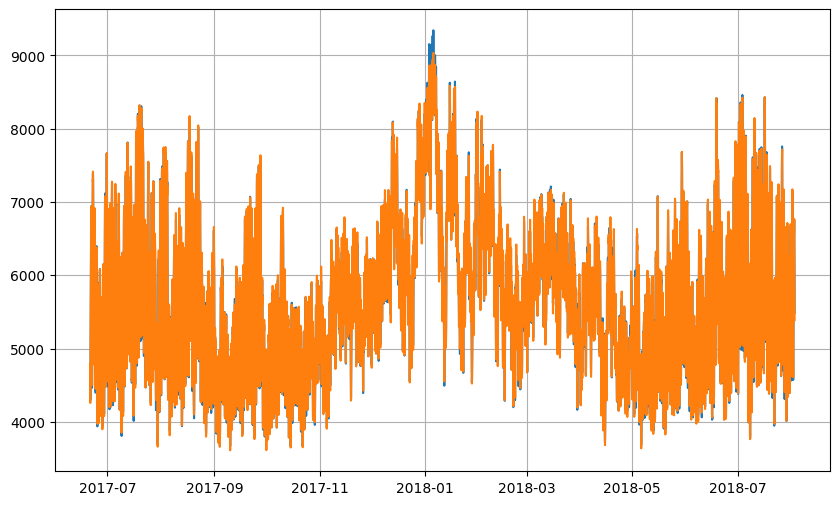

In [ ]:
# Plot the results
plot_series(time_valid, (energy_validation_inv, results_inv))

## Forecasting Evaluation
We can evaluate our forecasting results by using Mean Absolute Error (MAE) and Mean Squared Error (MSE)

In [ ]:
## Compute the MAE and MSE
print('MSE: ', tf.keras.metrics.mean_squared_error(energy_validation, results).numpy())
print('MAE: ', tf.keras.metrics.mean_absolute_error(energy_validation, results).numpy())

MSE:  0.0056040008
MAE:  0.05651633


Re-transformed MAE and MSE into the initial values format

In [ ]:
## Compute the MAE and MSE
print('MSE: ', tf.keras.metrics.mean_squared_error(energy_validation_inv, results_inv).numpy())
print('MAE: ', tf.keras.metrics.mean_absolute_error(energy_validation_inv, results_inv).numpy())

MSE:  5815.687
MAE:  57.57386


The R-square of our forecasting model

In [ ]:
from sklearn.metrics import r2_score

lstm_score = r2_score(energy_validation_inv, results_inv)
print("R^2 Score of LSTM model = ",lstm_score)

R^2 Score of LSTM model =  0.9941980843136207


We got a forecasting model with an R-square of 99.42% which is very good accuracy.

# Conclusion
In this project, we explored the application of machine learning models for time series forecasting with a theme of forecasting energy consumption, aiming to provide accurate forecasting that can contribute to more efficient energy management. The analysis focused on historical energy consumption data and seasonal patterns to build predictive models. We also got a very good R-Square of 99%